#  INT303 Big Data Analytics


##  Lab 8 Bagging

**XJTLU**<br>
**S1 2021**<br>
**Instructors:** Jia WANG <br>
**Lab Instructor:** Jia WANG <br>


---

## Ouline:

* Overfitting
* Tree model visualization
* Random Forest Model


In [26]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')
sns.set(style="ticks")
%matplotlib inline

In [27]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax, plot_data=True, fill=True, color='Blues'):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax, plot_data, fill, color)
    
    return ax

In [28]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens'):
    if plot_data:
        # PLOT DATA
        ax.scatter(x[y==1,0], x[y==1,1], c='green')
        ax.scatter(x[y==0,0], x[y==0,1], c='grey')
    
    # CREATE MESH
    interval = np.arange(min(x.min(), y.min()),max(x.max(), y.max()),0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if fill:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap=color)
    else:
        ax.contour(x1, x2, yy, alpha=0.1, cmap=color)
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [29]:
npoints = 200 
#Sample two independent N(0,5^2) r.v. using the MultiVariate Normal
data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=npoints)
data = np.hstack((data, np.zeros((npoints, 1))))

data[data[:, 0]**2 + data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(data[data[:, 0]**2 + data[:, 1]**2 < 3**2]), p=[0.2, 0.8])

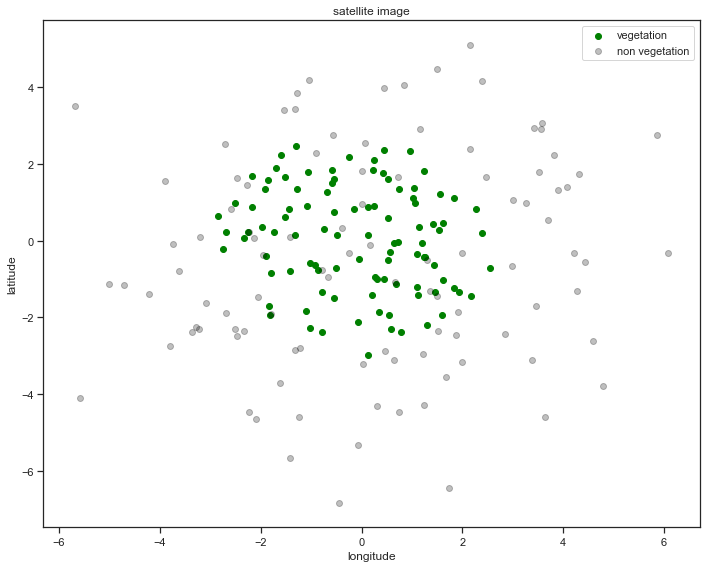

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
x = data[:, :-1]
y = data[:, -1]
ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation')
ax.scatter(x[y == 0, 0], x[y == 0, 1], c='black', label='non vegetation', alpha=0.25)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('satellite image')
ax.legend()
plt.tight_layout()
plt.show() 

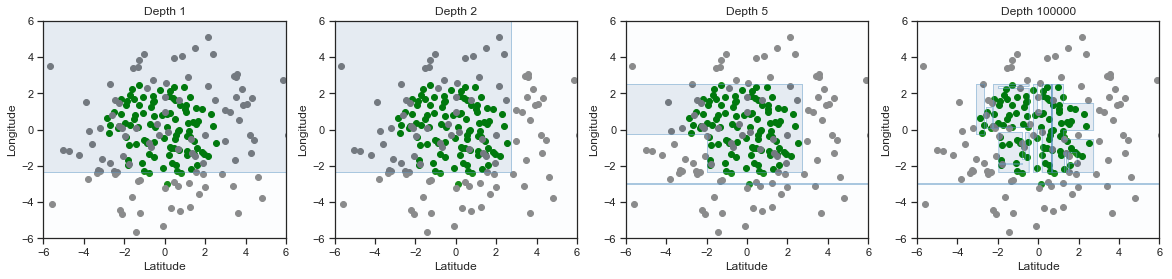

In [6]:
#Different Depths
depths = [1, 2, 5, 100000]
fig, ax = plt.subplots(1, len(depths), figsize=(20, 4))
x = data[:, :-1]
y = data[:, -1]
ind = 0
for i in depths:
    ax[ind] = fit_and_plot_dt(x, y, i, 'Depth {}'.format(i), ax[ind]) 
    ax[ind].set_xlim(-6, 6)
    ax[ind].set_ylim(-6, 6)
    ind += 1    

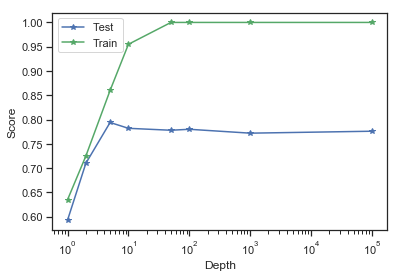

In [7]:
#Overfitting

depths = [1, 2, 5,10, 50, 100, 1000, 100000]

test_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=1000)
test_data = np.hstack((test_data, np.zeros((1000, 1))))
test_data[test_data[:, 0]**2 + test_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(test_data[test_data[:, 0]**2 + test_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

scores = []
scores_train = []
for depth in depths:
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)
    scores.append(dt.score(x_test, y_test))
    scores_train.append(dt.score(x, y))
    
plt.plot(depths, scores, 'b*-', label = 'Test')
plt.plot(depths, scores_train, 'g*-', label = 'Train')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.xscale('log')
plt.legend();



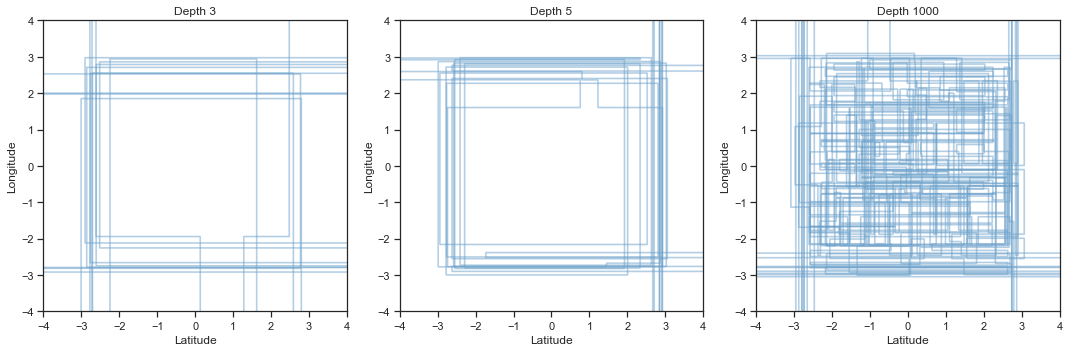

In [8]:
#Variance comparison between simple and complex models
depths = [3, 5, 1000]

fig, ax = plt.subplots(1, len(depths), figsize=(15, 5))

for d in range(len(depths)):
    for i in range(10):
        new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
        new_data = np.hstack((new_data, np.zeros((200, 1))))
        new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
        x = new_data[:, :-1]
        y = new_data[:, -1]
        ax[d] = fit_and_plot_dt(x, y, depths[d], 'Depth {}'.format(depths[d]), ax[d], plot_data=False, fill=False) 
        ax[d].set_xlim(-4, 4)
        ax[d].set_ylim(-4, 4)
plt.tight_layout()
plt.show() 

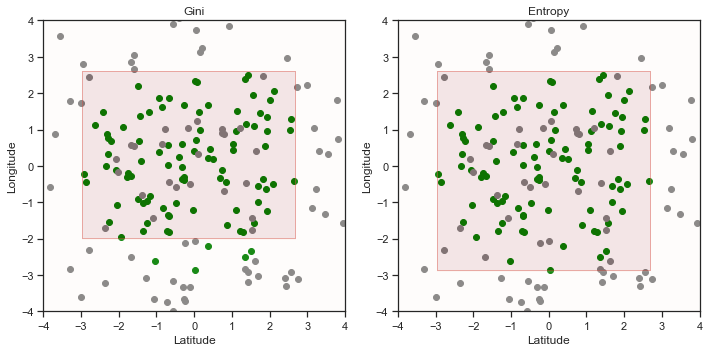

In [9]:
#Different Splitting Criteria
depth = 5

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
new_data = np.hstack((new_data, np.zeros((200, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
x = new_data[:, :-1]
y = new_data[:, -1]

dt = tree.DecisionTreeClassifier(max_depth = depth)
dt.fit(x, y)

ax[0] = plot_tree_boundary(x, y, dt, 'Gini', ax[0], color='Reds')

dt = tree.DecisionTreeClassifier(max_depth = depth, criterion='entropy')
dt.fit(x, y)

ax[1] = plot_tree_boundary(x, y, dt, 'Entropy', ax[1], color='Reds')


ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)
        
plt.tight_layout()
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


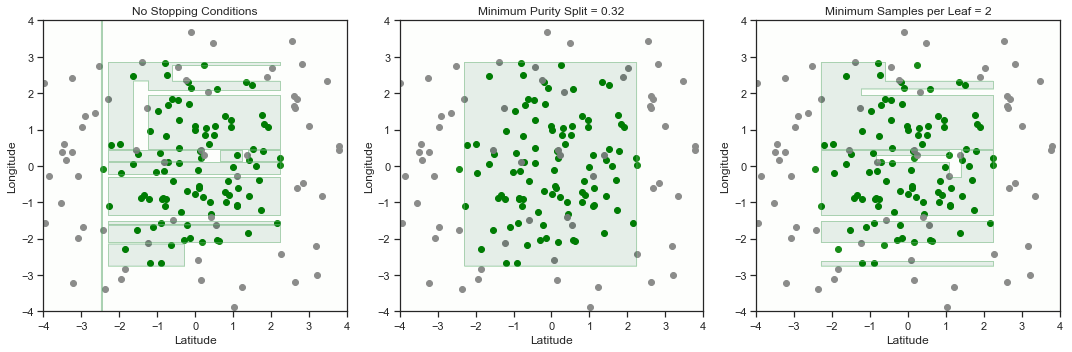

In [55]:
#Different Stopping Conditions

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
new_data = np.hstack((new_data, np.zeros((200, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
x = new_data[:, :-1]
y = new_data[:, -1]

dt = tree.DecisionTreeClassifier()
dt.fit(x, y)

ax[0] = plot_tree_boundary(x, y, dt, 'No Stopping Conditions', ax[0])

dt = tree.DecisionTreeClassifier(min_impurity_split=0.32)
dt.fit(x, y)

ax[1] = plot_tree_boundary(x, y, dt, 'Minimum Purity Split = 0.32', ax[1])

dt = tree.DecisionTreeClassifier(min_samples_leaf=2)
dt.fit(x, y)

ax[2] = plot_tree_boundary(x, y, dt, 'Minimum Samples per Leaf = 2', ax[2])

ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)
ax[2].set_xlim(-4, 4)
ax[2].set_ylim(-4, 4)      

plt.tight_layout()
plt.show() 

# Random forest 
## Titanic application

In [56]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# Missing data 
total = len(data)
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data
pd.DataFrame({"# Missing": missing_data, "% Missing": round(missing_data / len(data) * 100, 2)})

,# Missing,% Missing
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [58]:
# Fill missing data in Age column
data['Age'].fillna(data['Age'].mean(), inplace = True)

<Figure size 432x288 with 0 Axes>

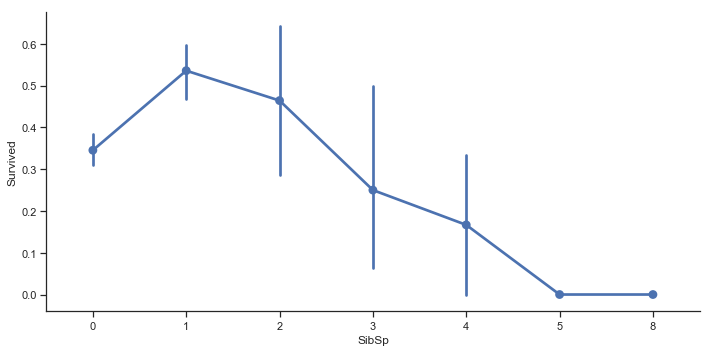

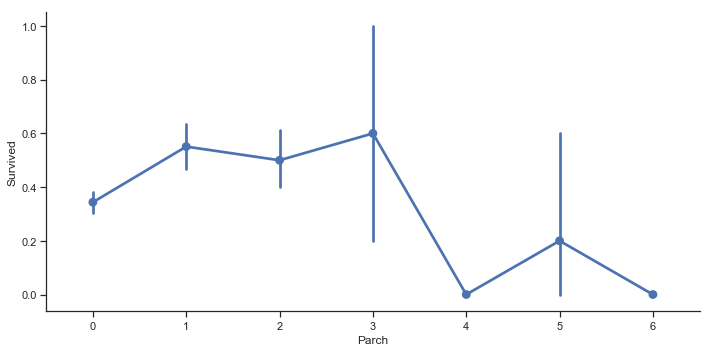

In [59]:
# Survival probability by SibSp and Parch 
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = data, kind = 'point', aspect = 2)

In [60]:
# Combine SibSp and Parch into a single feature family_size 
data['family_size'] = data['SibSp'] + data['Parch']
data[['SibSp', 'Parch', 'family_size']].head(10)

,SibSp,Parch,family_size
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
5,0,0,0
6,0,0,0
7,3,1,4
8,0,2,2
9,1,0,1


In [61]:
# Drop SibSp, Parch and PassengerId features
data = data.drop(['SibSp', 'Parch', 'PassengerId'], axis = 1)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [62]:
# Survival probability by missing cabin
data.groupby(data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [39]:
# 1: Cabin is missing, 0: Cabin is not missing 
data['cabin_missing'] = np.where(data['Cabin'].isnull(), 1, 0)
data[['Cabin', 'cabin_missing']].head()

,Cabin,cabin_missing
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


In [40]:
# Encode Sex 0: male, 1: female
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,cabin_missing
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,1


In [41]:
# Drop Cabin, Embarked, Name and Ticket columns
data = data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,Fare,family_size,cabin_missing
0,0,3,0,22.0,7.2500,1,1
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,1,0
4,0,3,0,35.0,8.0500,0,1


In [42]:
# Separate features and target variables
features = data.drop('Survived', axis = 1)
target = data['Survived']

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Check shape (rows, columns)
print(f"Original data: {data.shape}")
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_test: {Y_test.shape}")

Original data: (891, 7)
X_train: (712, 6)
Y_train: (712,)
X_test: (179, 6)
Y_test: (179,)


# Random forest

In [43]:
# Default hyperparameters for RandomForestClassifier 
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


---

In [45]:
# GridSearchCV for RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs = -1, random_state = 10)
params = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, params, cv = 5, n_jobs = -1)
cv.fit(X_train, Y_train)
pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.146755,0.009123,0.110770,0.002077,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.832168,0.846154,0.818182,0.788732,0.858156,0.828652,0.024005,1
7,0.162138,0.016110,0.108697,0.000530,8,50,"{'max_depth': 8, 'n_estimators': 50}",0.832168,0.825175,0.804196,0.823944,0.843972,0.825843,0.012963,2
5,0.544526,0.076645,0.109511,0.000950,4,250,"{'max_depth': 4, 'n_estimators': 250}",0.832168,0.846154,0.818182,0.788732,0.836879,0.824438,0.019987,3
10,0.181392,0.019436,0.111681,0.006719,16,50,"{'max_depth': 16, 'n_estimators': 50}",0.825175,0.797203,0.818182,0.816901,0.843972,0.820225,0.015036,4
16,0.169707,0.029538,0.109989,0.001610,None,50,"{'max_depth': None, 'n_estimators': 50}",0.818182,0.797203,0.818182,0.823944,0.836879,0.818820,0.012800,5


In [46]:
# Best hyperparameters for RandomForestClassifier 
cv.best_params_


{'max_depth': 4, 'n_estimators': 50}

In [52]:

rf = RandomForestClassifier(n_estimators = 50, max_depth = 4, n_jobs = -1, random_state = 42)
# Fit model

rf_model = rf.fit(X_train, Y_train)


# Predict 

Y_pred = rf_model.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(Y_test, Y_pred))
print ('F1 score:', f1_score(Y_test, Y_pred))
print ('Recall:', recall_score(Y_test, Y_pred))
print ('Precision:', precision_score(Y_test, Y_pred))
print ('\n clasification report:\n', classification_report(Y_test, Y_pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, Y_pred))




Accuracy: 0.7988826815642458
F1 score: 0.7391304347826088
Recall: 0.6891891891891891
Precision: 0.796875

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


 confussion matrix:
 [[92 13]
 [23 51]]


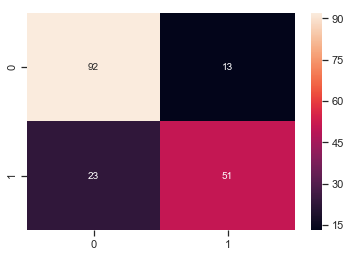

In [53]:
# Confusion matrix for RandomForestClassifier
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')